## TITLE : Predict whether a mammogram mass is benign or malignant 
               GODFREY MGHASE 239195, IVAN YEVGLEVSKIY 239199 

In this project we aim at finding the model which will accurately predict whether a mammogram mass is a benign or malignant. The aim is to assist doctors to correctly interpret the mammogram results inorder to avoid wrong breast surgeries. In the whole process we will use python libraries such as scikit to achieve the goal. We start with dataset download, pre-processing them, Training the data through different models and hence conclusion. Comments are provided in each section of the code block for the clear understanding of the codes. 

## Data Pre-processing

In [1]:
# Importing Important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Dataset

mass = pd.read_csv('./data/mammographic_masses_data.txt')
mass.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [3]:
# Renaming Columns and Fill NAN for ? Values

mass = pd.read_csv('c:/python/mammographic_masses_data.txt',na_values = '?', 
                   names = ['BI-RADS','age','shape','margin','density','severity'])
mass.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [4]:
mass.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [5]:
# Identify the Null Rows NB: BI-RADS is not a part of features

mass[mass['age'].isnull()|mass['shape'].isnull()|mass['margin'].isnull()|mass['density'].isnull()]

,BI-RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


In [6]:
mass.dropna(inplace = True) # Droping the Null Rows

In [7]:
mass.describe() # All the rows have data inputs

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [8]:
features = mass[['age','shape','margin','density']].values # Input Data
label = mass[['severity']].values                          # Output Data

In [9]:
features.shape     # Dimension of the input data

(830, 4)

In [10]:
label.shape       # Dimension of the output data

(830, 1)

In [11]:
label = label.ravel() # convert to 1d Array

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler # Scaling the input data
features = MinMaxScaler().fit_transform(features)

## Model Evaluation Section - ML

In [13]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split # For Training and Test set classifications

X_train,X_test,y_train,y_test =  train_test_split(features,label, test_size = 0.1, random_state = 0)

In [14]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import cross_val_score


In [15]:
model_G = GaussianNB()
model_G.fit(X_train,y_train)
y_pred = model_G.predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.87      0.73      0.80        45
           1       0.73      0.87      0.80        38

    accuracy                           0.80        83
   macro avg       0.80      0.80      0.80        83
weighted avg       0.81      0.80      0.80        83



In [16]:
model_M = MultinomialNB()

model_M.fit(X_train,y_train)
y_pred = model_M.predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        45
           1       0.74      0.84      0.79        38

    accuracy                           0.80        83
   macro avg       0.80      0.80      0.80        83
weighted avg       0.80      0.80      0.80        83



In [17]:
from sklearn.svm import SVC
#SVC().get_params()
model_s_l = SVC(kernel='linear', C=0.01) # Linear function


model_s_l.fit(X_train,y_train)
y_pred = model_s_l.predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        45
           1       0.73      0.92      0.81        38

    accuracy                           0.81        83
   macro avg       0.82      0.82      0.81        83
weighted avg       0.83      0.81      0.81        83



In [18]:
# Sigmoid Function, SVC
model_s_s = SVC(kernel='sigmoid', C=0.1) 
model_s_s.fit(X_train,y_train)
y_pred = model_s_s.predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.76      0.60        45
           1       0.27      0.11      0.15        38

    accuracy                           0.46        83
   macro avg       0.38      0.43      0.38        83
weighted avg       0.39      0.46      0.40        83



In [19]:
# Polynomial Function, SVC
model_s_p = SVC(kernel='poly', C=0.1)
model_s_p.fit(X_train,y_train)
y_pred =model_s_p.predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        45
           1       0.80      0.87      0.84        38

    accuracy                           0.84        83
   macro avg       0.84      0.85      0.84        83
weighted avg       0.85      0.84      0.84        83



In [20]:
# rbf Function, SVC
model_s_r = SVC(kernel='rbf',C=1)
model_s_r.fit(X_train,y_train)
y_pred =model_s_r.predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        45
           1       0.75      0.87      0.80        38

    accuracy                           0.81        83
   macro avg       0.81      0.81      0.81        83
weighted avg       0.82      0.81      0.81        83



In [21]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=0.1)
model_lr.fit(X_train,y_train)
y_pred =model_lr.predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        45
           1       0.76      0.84      0.80        38

    accuracy                           0.81        83
   macro avg       0.81      0.81      0.81        83
weighted avg       0.81      0.81      0.81        83



In [22]:
from sklearn.tree import DecisionTreeClassifier
model_dec = DecisionTreeClassifier(max_depth = 5)
model_dec.fit(X_train,y_train)
y_pred =model_dec.predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77        45
           1       0.71      0.79      0.75        38

    accuracy                           0.76        83
   macro avg       0.76      0.76      0.76        83
weighted avg       0.76      0.76      0.76        83



In [23]:
from sklearn.ensemble import RandomForestClassifier
model_rand = RandomForestClassifier(n_estimators = 10, max_depth = 5)
model_rand .fit(X_train,y_train)
y_pred =model_rand .predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        45
           1       0.73      0.84      0.78        38

    accuracy                           0.78        83
   macro avg       0.79      0.79      0.78        83
weighted avg       0.79      0.78      0.78        83



In [24]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 8)
model_knn .fit(X_train,y_train)
y_pred =model_knn .predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        45
           1       0.75      0.87      0.80        38

    accuracy                           0.81        83
   macro avg       0.81      0.81      0.81        83
weighted avg       0.82      0.81      0.81        83



In [25]:
# Gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred = model_gb.predict(X_test)

# Summary of the prediction made by the classifier
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        45
           1       0.73      0.79      0.76        38

    accuracy                           0.77        83
   macro avg       0.77      0.77      0.77        83
weighted avg       0.77      0.77      0.77        83



In [26]:
from sklearn.metrics import accuracy_score
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    SVC(kernel='linear', C=0.01),
    SVC(kernel='sigmoid', C=0.1),
    SVC(kernel='poly', C=0.1),
    SVC(kernel='rbf',C=1),
    LogisticRegression(C=0.1),
    DecisionTreeClassifier(max_depth = 5),
    KNeighborsClassifier(n_neighbors = 8),
    GradientBoostingClassifier()
                  ]
 
logs = np.empty((len(classifiers),2), dtype = list)
# Logging data in a dataframe
log_cols=["Classifier Name", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    log_entry = pd.DataFrame([[str(clf), acc*100]], columns=log_cols)
    log = log.append(log_entry)


log.reset_index(drop = True,inplace = True)
log = log.sort_values('Accuracy', ascending = False, ignore_index = True)
log

,Classifier Name,Accuracy
0,"SVC(C=0.1, kernel='poly')",84.337349
1,"SVC(C=0.01, kernel='linear')",80.722892
2,SVC(C=1),80.722892
3,LogisticRegression(C=0.1),80.722892
4,KNeighborsClassifier(n_neighbors=8),80.722892
5,GaussianNB(),79.518072
6,MultinomialNB(),79.518072
7,GradientBoostingClassifier(),77.108434
8,DecisionTreeClassifier(max_depth=5),75.903614
9,"SVC(C=0.1, kernel='sigmoid')",45.783133


## ML Conclusion

Six different algorithms were deployed inorder to classify the level of severity for the mammogram mass. The highest accuracy obtained was 0.84/1.0 using SVM with a regularization of 0.1 and polynomial function as a kernel function. 

# NEURAL NETWORK SECTION

In the second part of the task we used neural networks to predict if tumor is benign or malignant. The neural networks was created using 'keras' and 'tensorflow' libraries for python. This packages make it possible to train and evaluate the models effeciently thanks to easy data operating functions. In this work, we present four neural networks with different accuracy, structure and performance time.

Firstly, we need to import all libraries and functions we want to work with. It should be noticed, that all training and evaluating operations in this work were performed using NVidia 1660Ti GPU-card to increase the overall efficiency of the system. Notice: running the code on CPU could be very time-consuming.

In [27]:
# importing the elements from keras, which we need to create a model
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras import models

from tensorflow.keras.utils import to_categorical


# tensorflow itself is implemented to allow perform operations using GPU-Card
import tensorflow as tf
#physical_devices = tf.config.list_physical_devices('GPU') 
# allow the programm to use all memory of GPU
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [28]:
#creating the numpy array of tumor nature
mam_labels = mass['severity'].to_numpy()
mam_labels

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

In [29]:
#creating the array of features which are used to work with model
mam_data = mass[['age','shape','margin','density']].to_numpy()
mam_data

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

It is strictly recommended to use the different data for training and evaluation of the network. Thus, the data is divided to 'train' and 'test' datasets. According to the data, we also classify labels.

In [30]:
train_lbls = mam_labels[:600].astype('float32')
len(train_lbls)

600

In [31]:
test_lbls = mam_labels[600:].astype('float32')
len(test_lbls)

230

In [32]:
train_data = mam_data[:600].astype('float32')
train_data

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [29.,  1.,  1.,  3.],
       [53.,  2.,  1.,  3.],
       [66.,  4.,  4.,  3.]], dtype=float32)

In [33]:
test_data = mam_data[600:].astype('float32')
test_data[:5][:4]

array([[76.,  4.,  4.,  3.],
       [58.,  2.,  1.,  2.],
       [96.,  3.,  4.,  3.],
       [70.,  4.,  4.,  3.]], dtype=float32)

As clearly seen from the results, first 600 samples are used to train the model and the rest 230 - to evaluate it.

In [34]:
''' Data Scaling'''
# calculating the mean value of every feature
mean = train_data.mean(axis=0)
# substracting the mean from each value
train_data -= mean
# computing the standard deviation of every feature
std = train_data.std(axis=0)
# dividing each value to the standard deviation
train_data /= std

# same for test data
test_data -= mean
test_data /= std

test_data[:5][:]

array([[ 1.3624141 ,  0.94756025,  0.7107992 ,  0.21707252],
       [ 0.14385739, -0.64275074, -1.1902983 , -2.6772258 ],
       [ 2.716366  ,  0.15240476,  0.7107992 ,  0.21707252],
       [ 0.95622855,  0.94756025,  0.7107992 ,  0.21707252],
       [-1.4808849 , -0.64275074, -1.1902983 ,  0.21707252]],
      dtype=float32)

As can be clearly seen from results, some values turned into negative, but the range of values is now more friendly to network. 
Since all data have appropriate format, networks could be tested.
After making some investigations about architecture of neural networks, it was found, that for processing small datasets with features presented in numbers, the most efficient way is to use small number of Dense layers. In Keras 'Dense' layer all the neurons in a layer are connected to those in the next layer. Activation 'sigmoid' transform the value in a range from 0 to 1.
For binary classification, the final output of the network should have the shape of one, represanting the final classification. Optimizers are used to minimize the losses in network. The most common and efficient one is 'RMSProp' which realizes the algorithm of gradient descent. Loss function 'binary_crossentropy' is most commonly used in binary classification and has a good precision when work with probabilities. To evaluate the accuracy of model we use 'accuracy' metrics, which represents how many samples were correctly recognized.
It is important to use the part of data for validation as pre-testing. Using this samples allow us to understand the approximate accuracy of net. For our experiments, we use the part of train data as validating data on a training and fitting stage.

#### 1. Two-layers model
For the first experiment, we tried to implement the simpliest network with only two layers for training. 

In [35]:
# training the model with two layers
net_sig = models.Sequential()

# creating the layers 
net_sig.add(layers.Dense(16, activation = 'sigmoid', input_shape = (4,)))
net_sig.add(layers.Dense(1, activation = 'sigmoid'))

# separating real training and validating data
val_data = train_data[:200]
part_train_data = train_data[200:]

val_lbls = train_lbls[:200]
part_train_lbls = train_lbls[200:]

# compilation of model
net_sig.compile(
            optimizer = 'rmsprop',
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

In [54]:
val_lbls

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
      dtype=float32)

With fitting of the model, it actually trains. Batch size indicates how much samples the network can process simultaneously. Epochs indicates the number of iterations network process all training data. Verbose hides intermediate results.

In [36]:
# history object maintains all information about accuracy and losses of both training and validating data
history = net_sig.fit(
                train_data,
                train_lbls,
                batch_size = 32,
                epochs = 50,
                verbose = 0,
                validation_data = (val_data, val_lbls))

In [37]:
# creating the dictionary of values
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

To illustrate the results of training 'matplotlib' library is used. Here presented the data for losses and accuracy both for validation and training losses.

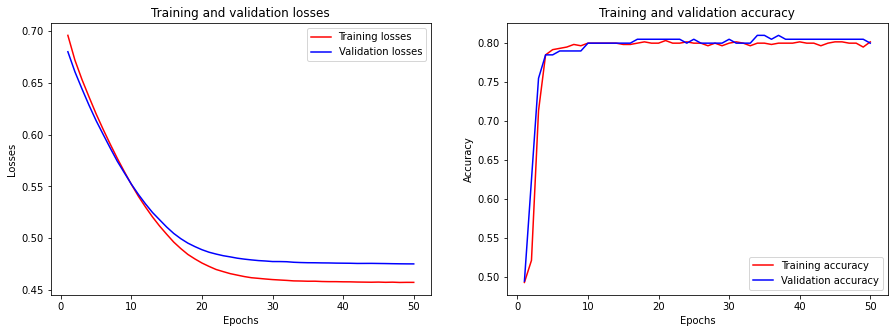

<Figure size 720x360 with 0 Axes>

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fig = plt.figure(figsize = (10,5))

accur = history_dict['accuracy']
val_accur = history_dict['val_accuracy']
losses = history_dict['loss']
val_losses = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

ax1.plot(epochs, losses, 'r', label = 'Training losses')
ax1.plot(epochs, val_losses, 'b', label = 'Validation losses')
ax1.set_title('Training and validation losses')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Losses')
ax1.legend()

ax2.plot(epochs, accur, 'r', label = 'Training accuracy')
ax2.plot(epochs, val_accur, 'b', label = 'Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

As the result, after 50 epochs of training network reach the accuracy of about 82% and losses have the minimal value of about 0.42. The final step is evaluating the model by using the test data. The result of this evaluation illustrates the final accuracy of trained network.

In [39]:
# the network is trained without any validation samples
net_sig.fit(train_data, train_lbls, epochs = 15, batch_size = 32, verbose = 0)
# predicting the results
result1 = net_sig.evaluate(test_data, test_lbls)
result1

8/8 [==============================] - 0s 812us/step - loss: 0.4288 - accuracy: 0.8304


[0.4288356900215149, 0.8304347991943359]

Finally, the simpliest network prediction about tumor nature have the accuracy of about 83%.

#### 2. Three-layers model
For the second try, the additional layer was added to the architecture of the model. Here the 'relu' activation type is used for input data of the layer. Such type of activation is recommended for models like this. 'Relu' (rectified linear unit) transform negative values into zero and guarantees non-linearity of data processing.

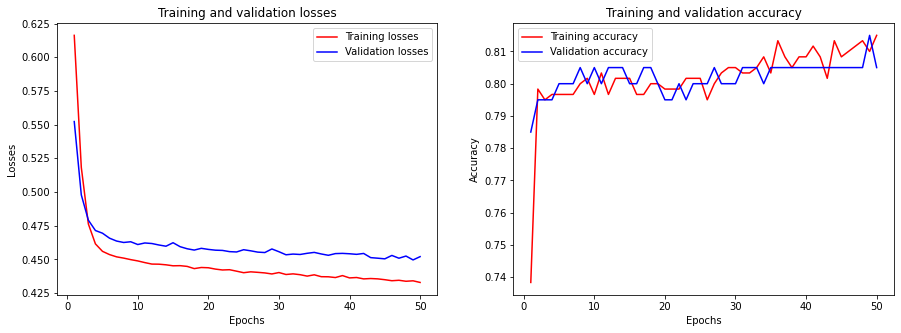

<Figure size 720x360 with 0 Axes>

In [40]:
# training the model with three layers
net_den_rel = models.Sequential()

# creating more than 32 neurons doesn't significantly increase efficiency  
net_den_rel.add(layers.Dense(32, activation = 'relu', input_shape = (4,)))
net_den_rel.add(layers.Dense(32, activation = 'relu'))
net_den_rel.add(layers.Dense(1, activation = 'sigmoid'))

# compilation of the model
net_den_rel.compile(
            optimizer = 'rmsprop',
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

# training the model
history = net_den_rel.fit(
                train_data,
                train_lbls,
                batch_size = 16,
                epochs = 50,
                verbose = 0,
                validation_data = (val_data, val_lbls))

history_dict = history.history

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fig = plt.figure(figsize = (10,5))

accur = history_dict['accuracy']
val_accur = history_dict['val_accuracy']
losses = history_dict['loss']
val_losses = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

ax1.plot(epochs, losses, 'r', label = 'Training losses')
ax1.plot(epochs, val_losses, 'b', label = 'Validation losses')
ax1.set_title('Training and validation losses')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Losses')
ax1.legend()

ax2.plot(epochs, accur, 'r', label = 'Training accuracy')
ax2.plot(epochs, val_accur, 'b', label = 'Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

As the result, after 50 epochs of training network reach the accuracy of about 81% and losses have the minimal value of about 0.42. The final step is evaluating the model by using the test data. The result of this evaluation illustrates the final accuracy of trained network.

In [41]:
net_den_rel.fit(train_data, train_lbls, epochs = 15, batch_size = 16, verbose = 0)
result2 = net_den_rel.evaluate(test_data, test_lbls)
result2

8/8 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.8174


[0.4514755606651306, 0.8173912763595581]

Even though on the training stage model reach the accuracy of 81%, after processing the real test data, the percentage of correcly predicted data is only 82.17%. 

#### 3. Model with slowed learning and regularization
In the third experiment, the learning of the model was artificially slowed in order to increase its accuracy. For this reason, the non-standard 'RMSprop' optimizer was used. The 'lr' is learning rate of the network. Thus, by reducing this value the system slower create patterns for learning. The 'l1' and 'l2' are the regularization methods, which correct the impact of one neuron to another. The regularization by both methods simultaneously shows the best accuracy.

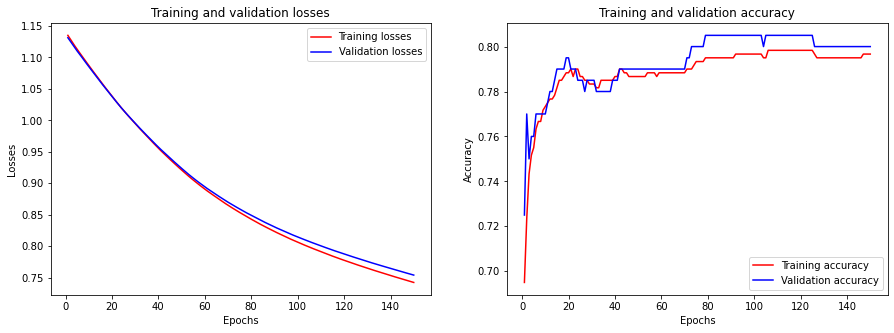

<Figure size 720x360 with 0 Axes>

In [42]:
# training the mixed model with slowed learning (it's due to RMSprop parameter)
net_den_rms = models.Sequential()

# creating four layers make it possible to process more parameters
net_den_rms.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                             input_shape = (4,)))
net_den_rms.add(layers.Dense(32, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = 'relu'))
net_den_rms.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation = 'relu'))
net_den_rms.add(layers.Dense(1, activation = 'sigmoid'))

# after testing, it was found that learning rate of 2e-5 is optimal for this architecture
net_den_rms.compile(
            optimizer = optimizers.RMSprop(lr = 2e-5),
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

# since the learning rate is slowed, system need more epochs to show the decent accuracy
history = net_den_rms.fit(
                train_data,
                train_lbls,
                batch_size = 16,
                epochs = 150,
                verbose = 0,
                validation_data = (val_data, val_lbls))

history_dict = history.history

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fig = plt.figure(figsize = (10,5))

accur = history_dict['accuracy']
val_accur = history_dict['val_accuracy']
losses = history_dict['loss']
val_losses = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

ax1.plot(epochs, losses, 'r', label = 'Training losses')
ax1.plot(epochs, val_losses, 'b', label = 'Validation losses')
ax1.set_title('Training and validation losses')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Losses')
ax1.legend()
ax2.plot(epochs, accur, 'r', label = 'Training accuracy')
ax2.plot(epochs, val_accur, 'b', label = 'Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

As the result, after 150 epochs of training network reach the accuracy of about 76% on validation data. Moreover, losses stay on the high level of 0.76 for the validation data. However, the results of evaluating network using test data are different.

In [43]:
net_den_rms.fit(train_data, train_lbls, epochs = 15, batch_size = 16, verbose = 0)
result3 = net_den_rms.evaluate(test_data, test_lbls)
result3

8/8 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.8043


[0.7138151526451111, 0.804347813129425]

It is clear, that the final accuracy of prediction is higher (82.6%) than one during the training stage (76%). However, losses are still high.

#### 4. Model with K-fold data cross-validation
In our final experiment, we use the method of K-fold data cross-validation. In this method, training data is divided into certain (K) number of blocks and then used in K-number of identical models. These models use part of fold for training and the rest for validation. The order of blocks differs from model to model. After every model is trained, the resulting accuracy of whole network is calculated as the average of K-models accuracies.

processing fold #  0
8/8 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.8348
processing fold #  1
8/8 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.8000
processing fold #  2
8/8 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.8261
processing fold #  3
8/8 [==============================] - 0s 998us/step - loss: 0.5035 - accuracy: 0.8174


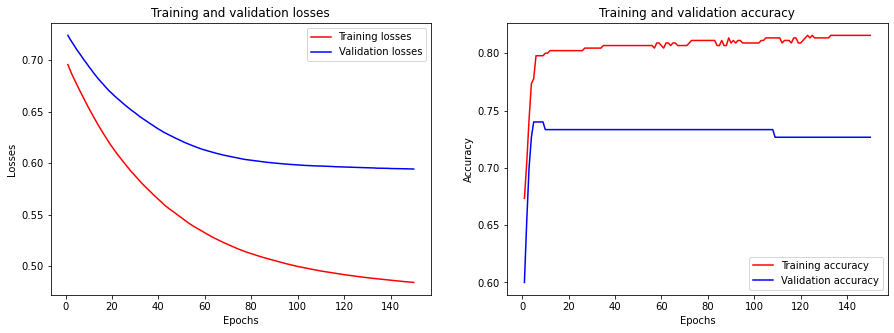

<Figure size 720x360 with 0 Axes>

In [44]:
# training the model with K-fold cross-validation
# set the number of K-folds
k = 4
epoch = 150
num_val_samples = len(train_data) // k

# creating the dictionaries for training and evalution accuracy of every model
acc_train = []
acc_results = []

# cycle for training K-number of models
for i in range(k):
    print('processing fold # ', i)
    
    # processing the validation data from block #k
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    
    val_lbls = train_lbls[i * num_val_samples : (i+1) * num_val_samples]

    # processing the train data from block #k
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                        train_data[(i+1) * num_val_samples:]], axis = 0)
    partial_train_lbls = np.concatenate([train_lbls[:i * num_val_samples], 
                                        train_lbls[(i+1) * num_val_samples:]], axis = 0)
    
    # creating #k model
    k_model = models.Sequential()
    
    k_model.add(layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (4,)))
    k_model.add(layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
    k_model.add(layers.Dense(8, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
    k_model.add(layers.Dense(1, activation = 'sigmoid'))
    
    # the train rate for these models are also slowed
    k_model.compile(
        optimizer = optimizers.RMSprop(lr = 2e-5),
        loss = 'binary_crossentropy',
        metrics = ['accuracy'])
    
    # training #k model
    history = k_model.fit(
        partial_train_data,
        partial_train_lbls,
        batch_size = 16,
        epochs = epoch,
        verbose = 0,
        validation_data = (val_data, val_lbls))
    
    # obtaining the accuracy and losses of #k model
    val_losses, val_acc = k_model.evaluate(test_data, test_lbls)
    
    # adding evaluated accuracy of #k model in the dictionary
    acc_train.append(val_acc)
    
    # obtain trainig accuracy of #k model
    acc_ev = history.history['accuracy']
    
    # addiing trainig accuracy of #k model in the dictionary
    acc_results.append(acc_ev)

history_dict = history.history

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
fig = plt.figure(figsize = (10,5))

accur = history_dict['accuracy']
val_accur = history_dict['val_accuracy']
losses = history_dict['loss']
val_losses = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

ax1.plot(epochs, losses, 'r', label = 'Training losses')
ax1.plot(epochs, val_losses, 'b', label = 'Validation losses')
ax1.set_title('Training and validation losses')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Losses')
ax1.legend()
ax2.plot(epochs, accur, 'r', label = 'Training accuracy')
ax2.plot(epochs, val_accur, 'b', label = 'Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

From the graph for the 4-th trained model, the losses during the validation are about 0.6. Also, the validation accuracy of about 75% is relatively low. However, the prediction accuracy is 82.2%. The final step is to compute the average accuracy, which is the final prediction accuracy of the whole network.

In [45]:
# calculating the mean 
average_acc = [np.mean([x[i] for x in acc_results]) for i in range(epoch)]

print(acc_train)
print(np.mean(acc_train))

[0.834782600402832, 0.800000011920929, 0.8260869383811951, 0.8173912763595581]
0.8195652067661285


Here presented the accuracies of each K-model and the average value for the whole network. The K-fold cross-validation has almost the same accuracy as the others rewiewed in this work.

### NN CONCLUSION

The maximum accuracy for binary classification of cancer tumor stands at 83% for the network with simpliest architecture without any optimizers or regularizations.

# GENERAL CONCLUSION

In [46]:
# append the NN result into log dataframe and visualize the results
NN = pd.DataFrame([['Neural Net',83.0434799]], columns = log_cols)

In [47]:
log = log.append(NN, ignore_index = True).sort_values('Accuracy', ascending = False, ignore_index = True)
log

,Classifier Name,Accuracy
0,"SVC(C=0.1, kernel='poly')",84.337349
1,Neural Net,83.043480
2,"SVC(C=0.01, kernel='linear')",80.722892
3,SVC(C=1),80.722892
4,LogisticRegression(C=0.1),80.722892
5,KNeighborsClassifier(n_neighbors=8),80.722892
6,GaussianNB(),79.518072
7,MultinomialNB(),79.518072
8,GradientBoostingClassifier(),77.108434
9,DecisionTreeClassifier(max_depth=5),75.903614


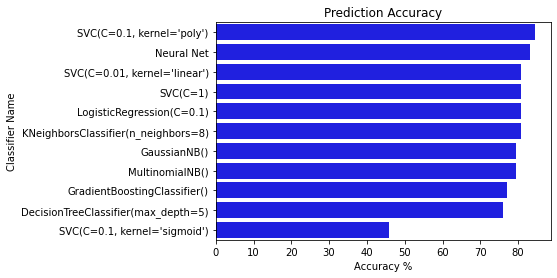

In [48]:
sns.barplot(x='Accuracy', y='Classifier Name', data=log, color="b")
plt.xlabel('Accuracy %')
plt.title('Prediction Accuracy')
plt.show()

We observe that, SVC with polynomial kernel function outperformed the rest of the algorithms while SVC with sigmoid kernel function performed the worst. The accuracy may become much higher if the number of training datasets are increased. Using common sense and the proposed SVM model, a doctor may make the more accurate decisions as to whether he may carry on an operation or not.